EJERCICIO 1:

Buscar un conjunto de datos a analizar:
* Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


EJERCICIO 2

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
* Esto se hace para que comprendais mejor los datos con los que estais trabajando.
* Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

 `Hemos escogido un dataset de características y precios de coches.`

In [37]:
df = pd.read_csv("datos/cars_price.csv", index_col = 0)
df.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


Hacemos una pequeña descripción de las variables de nuestro dataset:

- ID: número de identificación.
- PRICE: precio.
- LEVY: gravámenes.
- MANUFACTURER: fabricante.
- MODEL: modelo..
- PROD. YEAR: año de producción del coche.
- CATEGORY: marca..
- LEATHER INTERIOR: si el coche tiene cuero en su interior.
- FUEL TYPE: tipo de combustible.
- ENGINE VOLUME: volúmen del motor.
- MILEAGE: kilometraje recorrido.
- CYLINDERS: número de cilindros.
- GEAR BOX TIPE: tipo de caja de cambios.
- DRIVE WHEELS: 
- DOORS: número de puertas.
- WHEEL:
- COLOR: color del coche.
- AIRBAGS: número de bolsas de aire que tiene.

- Vemos la información general del dataframe.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-nu

Observamos que tenemos las columnas 'Doors', 'Mileage' y 'Levy' para convertirlas a tipo int. Primero haremos la limpieza de cada columna para luego hacer la conversión.

In [39]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [40]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [41]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

- Limpiamos la columna 'Doors' para que solo se quede con el nro de puertas.

In [42]:
df['Doors'] = df['Doors'].str.split('-').str[0]

In [43]:
df['Doors'] = df['Doors'].str.replace('>', ' ')

- Limpiamos la columna 'Mileage' para que solo se quede con el nro de kilometraje.

In [44]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]

In [45]:
df['Levy'] = df['Levy'].str.replace('-', '0')

- Hacemos las comprobaciones correspondientes para comprobar los valores únicos de las columnas que hemos limpiado. 

In [46]:
df['Doors'].unique()

array(['04', '02', ' 5'], dtype=object)

In [47]:
df['Mileage'].unique()

array(['186005', '192000', '200000', ..., '140607', '307325', '186923'],
      dtype=object)

In [48]:
df['Levy'].unique()

array(['1399', '1018', '0', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

- Convertimos las columnas 'Doors','Mileage' y 'levy' a tipo int.

In [49]:
df = df.astype({'Doors':'int64', 'Mileage':'int64', 'Levy':'int64'})

- Verificamos que se haya hecho el cambio de tipo de datos correctamente para las columnas 'Doors', 'Milage' y 'Levy'. 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-nu

- Vemos el número de filas y columnas del dataframe

In [51]:
df.shape #Tiene 19237 filas y 17 columnas.

(19237, 17)

- Vemos el nombre de las columnas de nuestro dataframe

In [52]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

- Vemos los principales estadísticos de las columnas numéricas.

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,19237.0,18555.927224,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Levy,19237.0,632.528669,567.721688,0.0,0.0,642.0,917.0,11714.0
...,...,...,...,...,...,...,...,...
Doors,19237.0,3.925872,0.403399,2.0,4.0,4.0,4.0,5.0
Airbags,19237.0,6.582627,4.320168,0.0,4.0,6.0,12.0,16.0


- Vemos los principales estadisticos de las variables categóricas

In [54]:
df.describe(include ="object").T

,count,unique,top,freq
Manufacturer,19237,65,HYUNDAI,3769
Model,19237,1590,Prius,1083
...,...,...,...,...
Wheel,19237,2,Left wheel,17753
Color,19237,16,Black,5033


- Vemos los valores nulos en el dataframe

In [55]:
df.isnull().sum()

Price      0
Levy       0
          ..
Color      0
Airbags    0
Length: 17, dtype: int64

- Chequeamos los outliers visualmente.

In [56]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Doors,Airbags
ID,,,,,,,
45654403,13328,1399,2010,186005,6.0,4,12
44731507,16621,1018,2011,192000,6.0,4,8


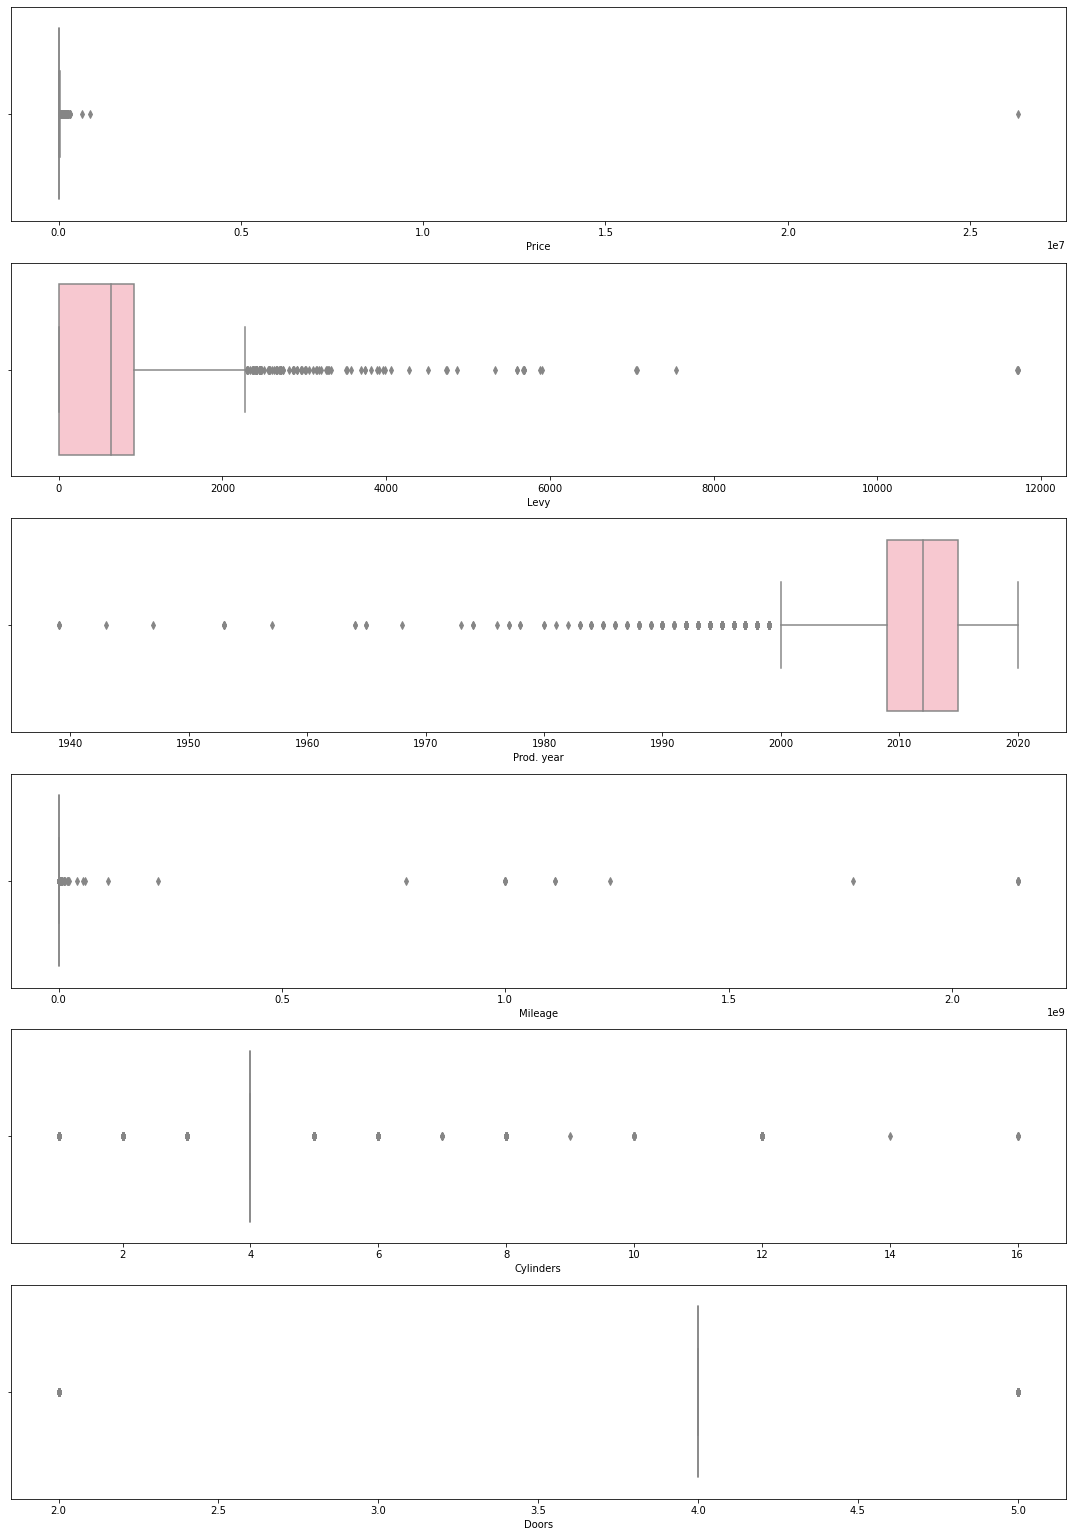

In [57]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

#### <font color=violet> EDA variable dependiente

Hemos decidido predecir el precio de los carros en función de una serie de características. 

Por lo tanto, nuestra variable respuesta será `price` y el resto las predictoras.

- Vemos los principales estadísticos de nuestra variable `Price`

In [58]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
             ...     
75%      2.207500e+04
max      2.630750e+07
Name: Price, Length: 8, dtype: float64

- Sacamos las características de los coches con el precio más bajo.

In [59]:
df[df['Price']== df['Price'].min()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45765530,1,0,OPEL,Astra,1999,Sedan,Yes,Petrol,1.6,122231,4.0,Manual,Front,4,Left wheel,Silver,4
45772201,1,1202,CHEVROLET,Lacetti,2006,Hatchback,No,Petrol,1.6,200000,4.0,Manual,Front,4,Left wheel,Black,2


- Sacamos las características de los coches con el precio más alto.

In [60]:
df[df['Price']== df['Price'].max()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45812886,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0


#### <font color=violet> EDA variables independientes